<a href="https://colab.research.google.com/github/salwang323/salwang323.github.io/blob/master/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  476.299988  477.850006  473.850006  477.709991  468.296417   
2022-01-04  479.220001  479.980011  475.579987  477.549988  468.139557   
2022-01-05  477.160004  477.980011  468.279999  468.380005  459.150299   
2022-01-06  467.890015  470.820007  465.429993  467.940002  458.718964   
2022-01-07  467.950012  469.200012  464.649994  466.089996  456.905426   

               Volume  
Date                   
2022-01-03   72668200  
2022-01-04   71178700  
2022-01-05  104538900  
2022-01-06   86858900  
2022-01-07   85111600  
                  Open       Close
Date                              
2022-01-03  476.299988  477.709991
2022-01-04  479.220001  477.549988
2022-01-05  477.160004  468.380005
2022-01-06  467.890015  467.940002
2022-01-07  467.950012  466.089996

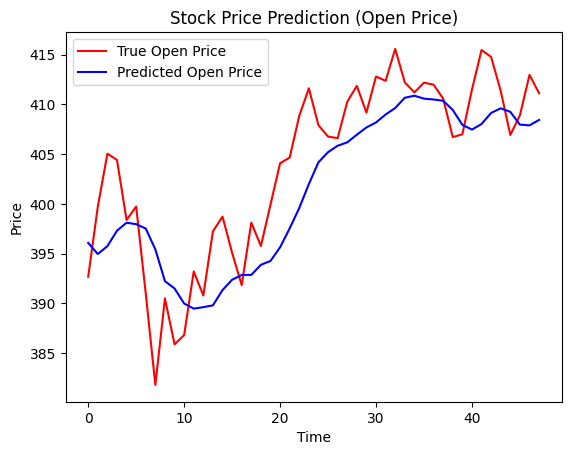

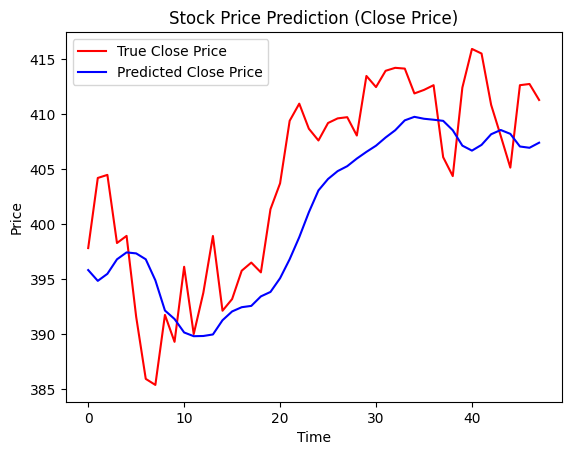

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas_datareader.data as pdr
import datetime as dt

start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime.now()

symbol = 'spy'  # Replace with the ticker symbol of the stock you want to fetch data for
df = yf.download(symbol, start=start_date, end=end_date)

print(df.head())

df = df[['Open', 'Close']]
print(df.head())

# 归一化处理
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# 划分训练集和测试集
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# 定义时间窗口大小
window_size = 20

# 创建训练集和测试集数据
def create_dataset(data, window_size):
    X, Y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

X_train, Y_train = create_dataset(train_data, window_size)
X_test, Y_test = create_dataset(test_data, window_size)

# 创建 LSTM 模型
model = Sequential()
model.add(LSTM(units=32, activation='relu', input_shape=(window_size, 2)))
model.add(Dense(units=2))
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# 预测测试集数据
predicted = model.predict(X_test)

# 将预测结果反归一化
predicted = scaler.inverse_transform(predicted)
Y_test = scaler.inverse_transform(Y_test)

# 可视化预测结果
plt.plot(Y_test[:, 0], color='red', label='True Open Price')
plt.plot(predicted[:, 0], color='blue', label='Predicted Open Price')
plt.title('Stock Price Prediction (Open Price)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.plot(Y_test[:, 1], color='red', label='True Close Price')
plt.plot(predicted[:, 1], color='blue', label='Predicted Close Price')
plt.title('Stock Price Prediction (Close Price)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()